In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import rc
from scipy.signal import find_peaks 
from cProfile import label

In [2]:
def percentage_species(c_spec, c_mn, xdata):
    val_spec = c_spec.values.T
    val_cMn = c_mn.values.T
    per_spec = (val_spec/val_cMn)*100
    df = pd.DataFrame(per_spec.T, index = xdata, columns = c_spec.columns)
    return df

In [3]:
sweep11_evap_path = './sw_sweep11_evap.CSV'
sweep11_evap = pd.read_csv(sweep11_evap_path, sep = ';', decimal = ',')

sweep17_evap_path = './sw_sweep17_evap.CSV'
sweep17_evap = pd.read_csv(sweep17_evap_path, sep = ';', decimal = ',')

sweep21_evap_path = './sw_sweep21_evap.CSV'
sweep21_evap = pd.read_csv(sweep21_evap_path, sep = ';', decimal = ',')

sweep37_evap_path = './sw_sweep37_evap.CSV'
sweep37_evap = pd.read_csv(sweep37_evap_path, sep = ';', decimal = ',')

In [4]:
sweep11_evap = percentage_species(sweep11_evap.iloc[0:, 4:], sweep11_evap['total Mn conc'], sweep11_evap['total Cl conc'])

sweep17_evap = percentage_species(sweep17_evap.iloc[0:, 4:], sweep17_evap['total Mn conc'], sweep17_evap['total Cl conc'])

sweep21_evap = percentage_species(sweep21_evap.iloc[0:, 4:], sweep21_evap['total Mn conc'], sweep21_evap['total Cl conc'])

sweep37_evap = percentage_species(sweep37_evap.iloc[0:, 4:], sweep37_evap['total Mn conc'], sweep37_evap['total Cl conc'])

In [5]:
display(sweep37_evap)

,Mn+2,MnBr+,MnCO3 (aq),MnCl+,MnCl2 (aq),MnCl3-,MnF+,MnHCO3+,MnOH+,MnSO4 (aq)
total Cl conc,,,,,,,,,,
0.549500,64.489431,0.022577,10.091057,9.159350,3.739350,0.565057,0.020901,0.670000,0.126593,11.115447
0.686875,59.122078,0.027366,10.427922,10.818831,5.386494,1.018506,0.023138,0.782143,0.108526,12.123377
0.824250,53.853514,0.032002,10.654595,12.338378,7.250811,1.645405,0.024946,0.882757,0.094541,12.954595
0.961625,48.976744,0.036540,10.827442,13.748837,9.320465,2.465814,0.026473,0.974605,0.083740,13.659535
1.099000,44.056911,0.040543,10.848780,14.897967,11.452033,3.457805,0.027486,1.047398,0.074337,14.104065
1.236375,39.433213,0.044112,10.784477,15.839350,13.623105,4.618412,0.028150,1.105451,0.066307,14.367148
1.373750,35.146104,0.047208,10.647403,16.575974,15.782143,5.930844,0.028505,1.149351,0.059331,14.469156
1.511125,31.310651,0.049967,10.479882,17.165680,17.934024,7.393491,0.028672,1.183343,0.053364,14.473077
1.648500,27.728997,0.052092,10.228997,17.519241,19.937940,8.940379,0.028518,1.201491,0.047921,14.312466


In [20]:
def make_subplot(axes, dataname, displaylabel, ncols, bb2a):
    ax = axes
    sns.scatterplot(data = dataname, ax = ax, s = 45)
    sns.lineplot(data = dataname, ax = ax, lw = 1)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.yaxis.offsetText.set_fontsize(9)
    handles, _ = ax.get_legend_handles_labels()
    ax.legend(handles = handles, labels = displaylabel, frameon = False, ncol=ncols, loc = 4, bbox_to_anchor = bb2a, fontsize = 8)

In [21]:
species = [r'Mn$^{2+}$', r'MnBr$^{+}$', r'MnCl$^{+}$', r'MnCl$_{2}$ (aq)', r'MnCl$_{3}^{-}$', r'MnCO$_{3}$ (aq)',
           r'MnF$^{+}$', r'MnHCO$_{3}^{+}$', r'MnOH$^{+}$', r'MnSO$_{4}$ (aq)']

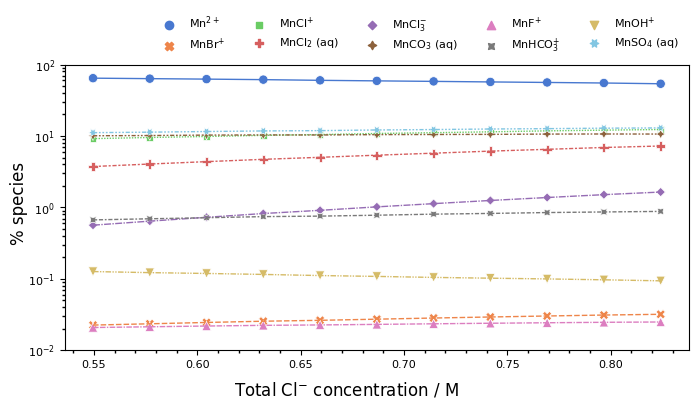

In [26]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
sns.set_palette('muted')

make_subplot(ax, sweep11_evap, species, 5, (1,1))
ax.set_yscale('log')
ax.set_ylim(10**(-2), 10**(2))

fig.supxlabel(r'Total Cl$^{-}$ concentration / M')
fig.supylabel('% species')

plt.tight_layout(pad=0.5)
plt.savefig('sweep11_evap.png', dpi=150)
plt.show()

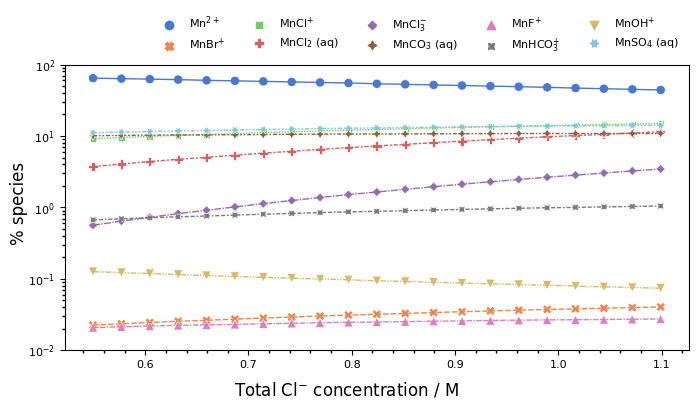

In [27]:
fig, ax = plt.subplots(1,1, figsize=(7,4))
sns.set_palette('muted')

make_subplot(ax, sweep21_evap, species, 5, (1,1))
ax.set_yscale('log')
ax.set_ylim(10**(-2), 10**(2))

fig.supxlabel(r'Total Cl$^{-}$ concentration / M')
fig.supylabel('% species')

plt.tight_layout(pad=0.5)
plt.savefig('sweep21_evap.png', dpi=150)
plt.show()

In [37]:
def make_subplot_brine(axes, dataname, ydata, color, displaylabel, ncols):
    ax = axes
    below = dataname.index.values < 1.236375
    above = dataname.index.values >= 1.099000
    sns.lineplot(x = dataname.index.values[below], y = dataname[ydata][below], ax = ax, lw = 1.2, ls = '-', color = color, 
                 label = displaylabel)
    sns.lineplot(x = dataname.index.values[above], y = dataname[ydata][above], ax = ax, lw = 1.2, ls = '--', color = color)
    ax.set_ylabel(None)
    ax.set_xlabel(None)
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(axis = 'both', which = 'major', direction = 'out', bottom = True, left = True, labelsize = 8)
    ax.tick_params(axis = 'both', which = 'minor', direction = 'out', width = 1, length = 2, bottom = True, left = True)
    ax.yaxis.offsetText.set_fontsize(9)
    ax.legend(frameon = False, ncol = ncols, loc = 4, bbox_to_anchor = (1,1), fontsize = 8)

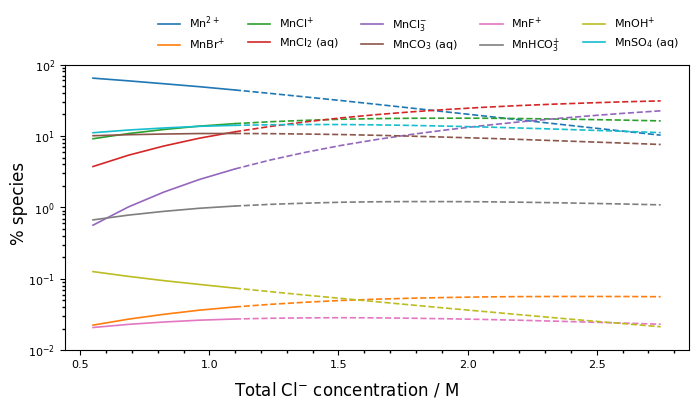

In [38]:
fig, ax = plt.subplots(1,1, figsize=(7,4))

make_subplot_brine(ax, sweep17_evap, 'Mn+2', 'tab:blue', species[0], 5)
make_subplot_brine(ax, sweep17_evap, 'MnBr+', 'tab:orange', species[1], 5)
make_subplot_brine(ax, sweep17_evap, 'MnCl+', 'tab:green', species[2], 5)
make_subplot_brine(ax, sweep17_evap, 'MnCl2 (aq)', 'tab:red', species[3], 5)
make_subplot_brine(ax, sweep17_evap, 'MnCl3-', 'tab:purple', species[4], 5)
make_subplot_brine(ax, sweep17_evap, 'MnCO3 (aq)', 'tab:brown', species[5], 5)
make_subplot_brine(ax, sweep17_evap, 'MnF+', 'tab:pink', species[6], 5)
make_subplot_brine(ax, sweep17_evap, 'MnHCO3+', 'tab:gray', species[7], 5)
make_subplot_brine(ax, sweep17_evap, 'MnOH+', 'tab:olive', species[8], 5)
make_subplot_brine(ax, sweep17_evap, 'MnSO4 (aq)', 'tab:cyan', species[9], 5)

ax.set_yscale('log')
ax.set_ylim(10**(-2), 10**(2))

fig.supxlabel(r'Total Cl$^{-}$ concentration / M')
fig.supylabel('% species')

plt.tight_layout(pad=0.5)
plt.savefig('sweep17_evap.png', dpi=150)
plt.show()

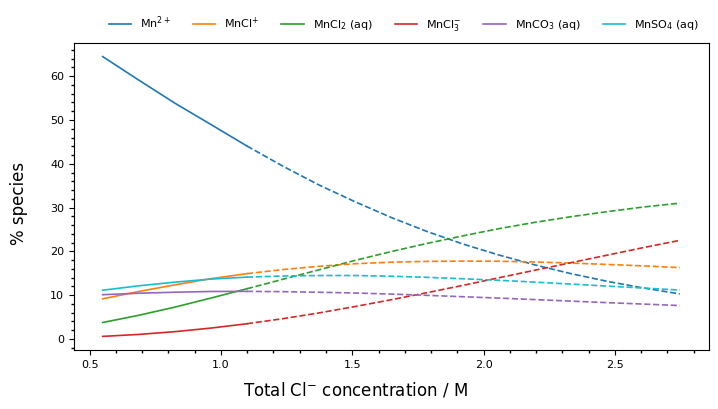

In [44]:
fig, ax = plt.subplots(1,1, figsize=(7.2,4))

make_subplot_brine(ax, sweep17_evap, 'Mn+2', 'tab:blue', species[0], 6)
make_subplot_brine(ax, sweep17_evap, 'MnCl+', 'tab:orange', species[2], 6)
make_subplot_brine(ax, sweep17_evap, 'MnCl2 (aq)', 'tab:green', species[3], 6)
make_subplot_brine(ax, sweep17_evap, 'MnCl3-', 'tab:red', species[4], 6)
make_subplot_brine(ax, sweep17_evap, 'MnCO3 (aq)', 'tab:purple', species[5], 6)
make_subplot_brine(ax, sweep17_evap, 'MnSO4 (aq)', 'tab:cyan', species[9], 6)

# ax.set_yscale('log')
# ax.set_ylim(10**(-2), 10**(2))

fig.supxlabel(r'Total Cl$^{-}$ concentration / M')
fig.supylabel('% species')

plt.tight_layout(pad=0.5)
plt.savefig('sweep17_evap_short.png', dpi=150)
plt.show()

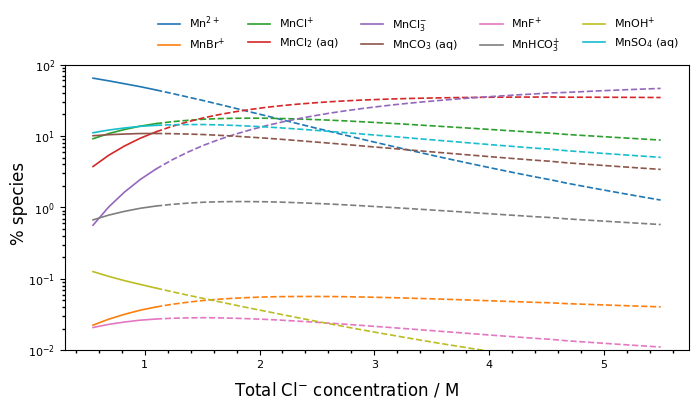

In [47]:
fig, ax = plt.subplots(1,1, figsize=(7,4))

make_subplot_brine(ax, sweep37_evap, 'Mn+2', 'tab:blue', species[0], 5)
make_subplot_brine(ax, sweep37_evap, 'MnBr+', 'tab:orange', species[1], 5)
make_subplot_brine(ax, sweep37_evap, 'MnCl+', 'tab:green', species[2], 5)
make_subplot_brine(ax, sweep37_evap, 'MnCl2 (aq)', 'tab:red', species[3], 5)
make_subplot_brine(ax, sweep37_evap, 'MnCl3-', 'tab:purple', species[4], 5)
make_subplot_brine(ax, sweep37_evap, 'MnCO3 (aq)', 'tab:brown', species[5], 5)
make_subplot_brine(ax, sweep37_evap, 'MnF+', 'tab:pink', species[6], 5)
make_subplot_brine(ax, sweep37_evap, 'MnHCO3+', 'tab:gray', species[7], 5)
make_subplot_brine(ax, sweep37_evap, 'MnOH+', 'tab:olive', species[8], 5)
make_subplot_brine(ax, sweep37_evap, 'MnSO4 (aq)', 'tab:cyan', species[9], 5)

ax.set_yscale('log')
ax.set_ylim(10**(-2), 10**(2))

fig.supxlabel(r'Total Cl$^{-}$ concentration / M')
fig.supylabel('% species')

plt.tight_layout(pad=0.5)
plt.savefig('sweep37_evap.png', dpi=150)
plt.show()

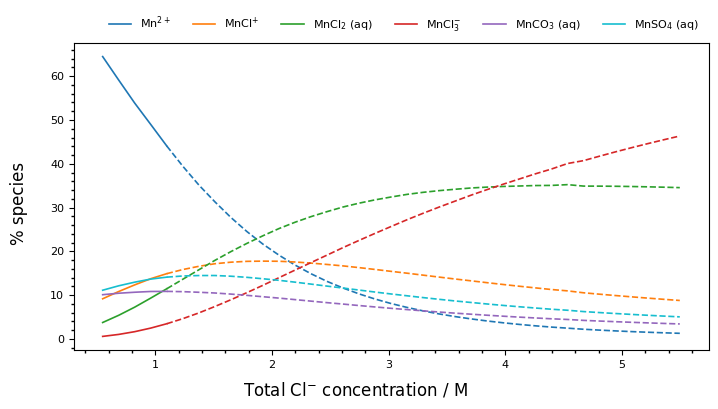

In [48]:
fig, ax = plt.subplots(1,1, figsize=(7.2,4))

make_subplot_brine(ax, sweep37_evap, 'Mn+2', 'tab:blue', species[0], 6)
make_subplot_brine(ax, sweep37_evap, 'MnCl+', 'tab:orange', species[2], 6)
make_subplot_brine(ax, sweep37_evap, 'MnCl2 (aq)', 'tab:green', species[3], 6)
make_subplot_brine(ax, sweep37_evap, 'MnCl3-', 'tab:red', species[4], 6)
make_subplot_brine(ax, sweep37_evap, 'MnCO3 (aq)', 'tab:purple', species[5], 6)
make_subplot_brine(ax, sweep37_evap, 'MnSO4 (aq)', 'tab:cyan', species[9], 6)

# ax.set_yscale('log')
# ax.set_ylim(10**(-2), 10**(2))

fig.supxlabel(r'Total Cl$^{-}$ concentration / M')
fig.supylabel('% species')

plt.tight_layout(pad=0.5)
plt.savefig('sweep37_evap_short.png', dpi=150)
plt.show()